In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [63]:
df=pd.read_csv("aqi-data.csv")

In [64]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [65]:
df.isnull().sum()

stn_code                       15764
sampling_date                      0
state                              0
location                           0
agency                         16355
type                             994
so2                             1313
no2                              858
rspm                            2696
spm                            28659
location_monitoring_station     2537
pm2_5                          49005
date                               0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49005 entries, 0 to 49004
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     33241 non-null  float64
 1   sampling_date                49005 non-null  object 
 2   state                        49005 non-null  object 
 3   location                     49005 non-null  object 
 4   agency                       32650 non-null  object 
 5   type                         48011 non-null  object 
 6   so2                          47692 non-null  float64
 7   no2                          48147 non-null  float64
 8   rspm                         46309 non-null  float64
 9   spm                          20346 non-null  float64
 10  location_monitoring_station  46468 non-null  object 
 11  pm2_5                        0 non-null      float64
 12  date                         49005 non-null  object 
dtypes: float64(6), o

In [67]:
df['sampling_date'] = pd.to_datetime(df['sampling_date'], errors='coerce')

C:\Users\solan\AppData\Local\Temp\ipykernel_7212\2956010252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sampling_date'] = pd.to_datetime(df['sampling_date'], errors='coerce')


In [68]:
df['sampling_date'].unique()

<DatetimeArray>
[                'NaT', '2004-01-02 00:00:00', '2004-01-05 00:00:00',
 '2004-01-09 00:00:00', '2004-01-12 00:00:00', '2004-01-16 00:00:00',
 '2004-01-19 00:00:00', '2004-01-23 00:00:00', '2004-01-27 00:00:00',
 '2004-01-30 00:00:00',
 ...
 '2005-10-17 00:00:00', '2005-03-14 00:00:00', '2005-04-06 00:00:00',
 '2005-04-08 00:00:00', '2005-04-22 00:00:00', '2005-06-27 00:00:00',
 '2005-08-20 00:00:00', '2005-08-27 00:00:00', '2005-09-27 00:00:00',
 '2005-10-11 00:00:00']
Length: 4232, dtype: datetime64[ns]

In [69]:
df.isnull().sum()

stn_code                       15764
sampling_date                   2418
state                              0
location                           0
agency                         16355
type                             994
so2                             1313
no2                              858
rspm                            2696
spm                            28659
location_monitoring_station     2537
pm2_5                          49005
date                               0
dtype: int64

In [70]:
numeric_columns = ['so2', 'no2', 'rspm', 'spm',]
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\solan\AppData\Local\Temp\ipykernel_7212\367506086.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [71]:
df.isnull().sum()

stn_code                       15764
sampling_date                   2418
state                              0
location                           0
agency                         16355
type                             994
so2                                0
no2                                0
rspm                               0
spm                                0
location_monitoring_station     2537
pm2_5                          49005
date                               0
dtype: int64

In [72]:

non_numeric_columns = ['stn_code', 'agency', 'type', 'location_monitoring_station', 'pm2_5']
for col in non_numeric_columns:
    df[col].fillna('Unknown', inplace=True)

C:\Users\solan\AppData\Local\Temp\ipykernel_7212\415883415.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)
C:\Users\solan\AppData\Local\Temp\ipykernel_7212\415883415.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna('Unknown', inplace=True)


In [ ]:
# Convert 'date' column to datetime format for better handling
df['date'] = pd.to_datetime(df['date'])

In [47]:
# Set the date as the index for easier plotting
df.set_index('date', inplace=True)

In [48]:
# Plot each pollutant over time
pollutants = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

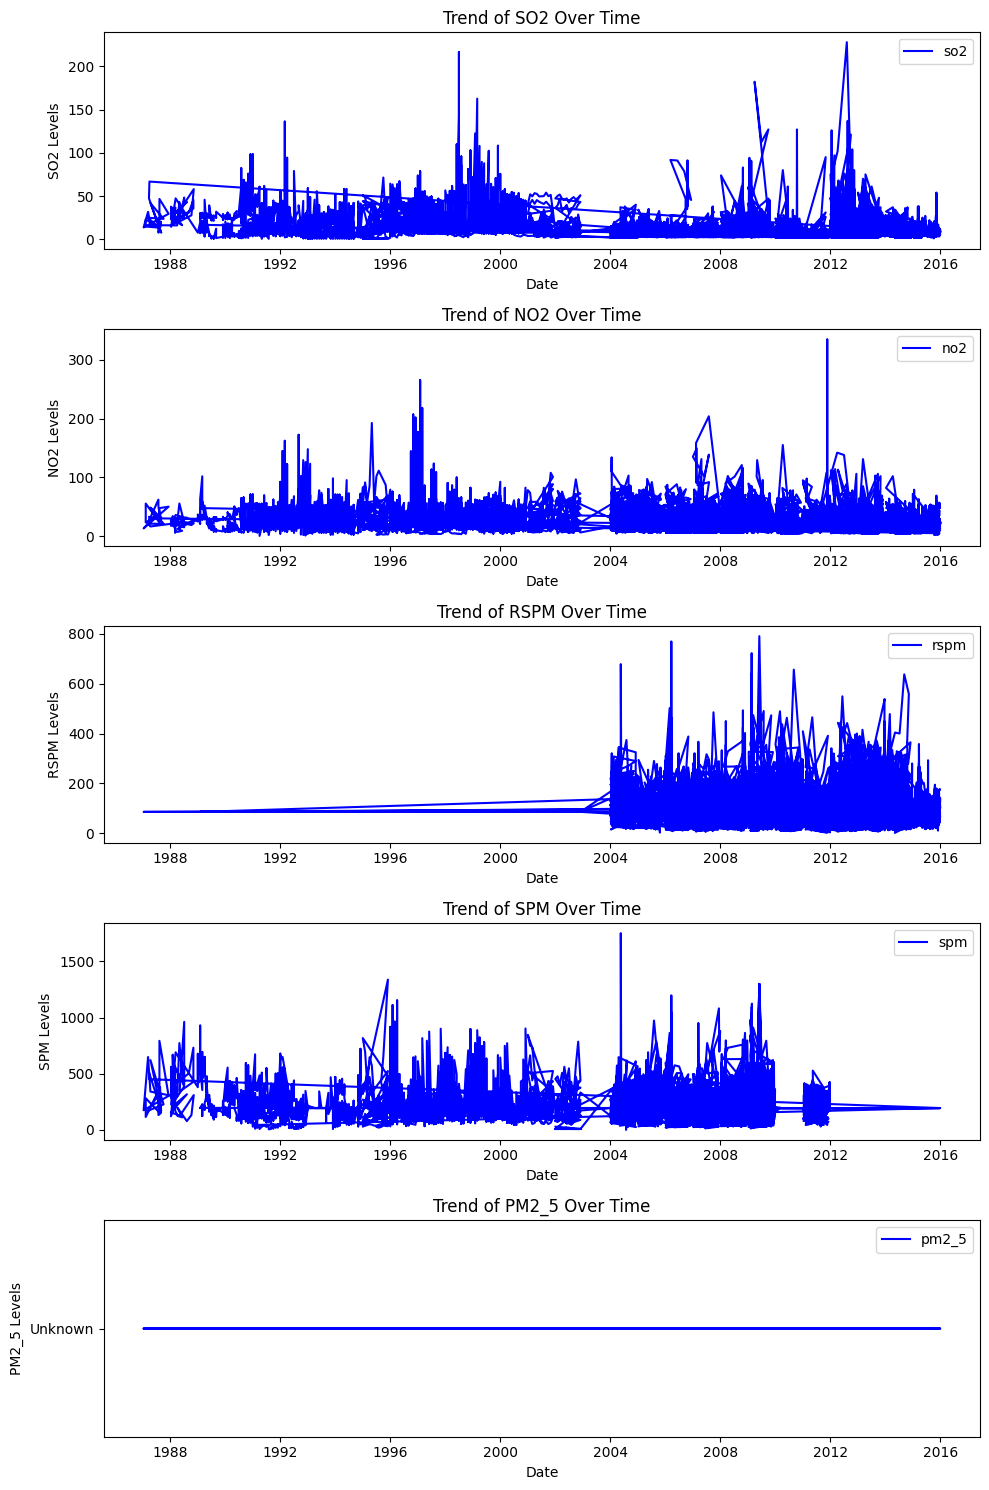

In [49]:
plt.figure(figsize=(10, 15))  # Adjust the size of the figure
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(len(pollutants), 1, i)  # Create a subplot for each pollutant
    plt.plot(df.index, df[pollutant], label=pollutant, color='blue')  # Plot pollutant levels
    plt.title(f'Trend of {pollutant.upper()} Over Time')  # Title for the subplot
    plt.xlabel('Date')  # X-axis label
    plt.ylabel(f'{pollutant.upper()} Levels')  # Y-axis label
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()  # Display the plots

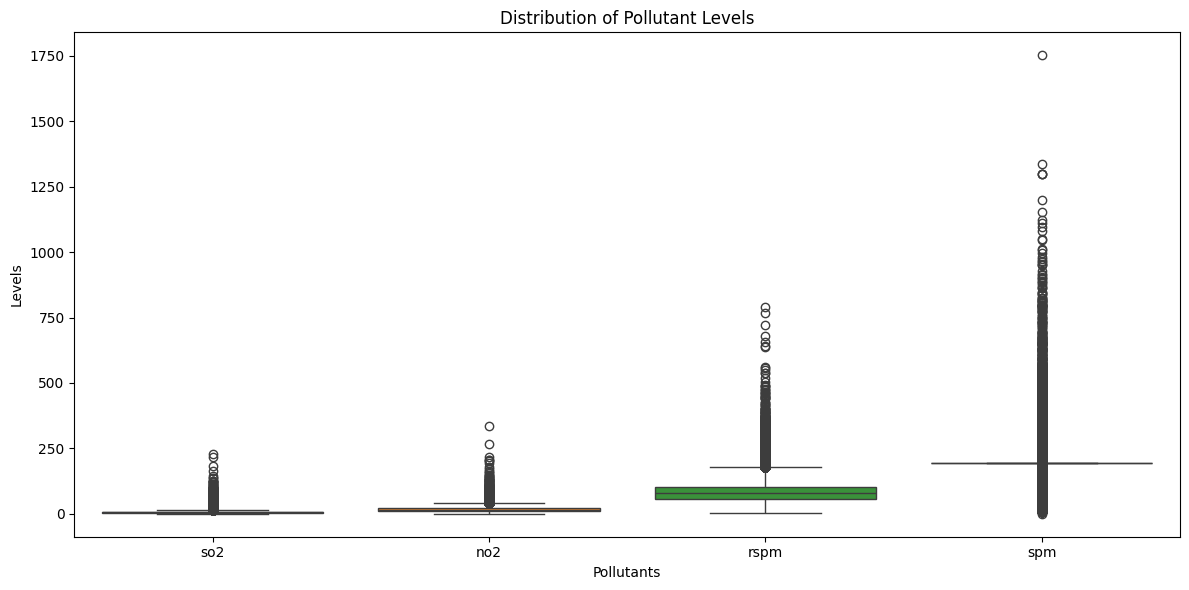

In [50]:
# Box plot for pollutant distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[pollutants])
plt.title('Distribution of Pollutant Levels')
plt.xlabel('Pollutants')
plt.ylabel('Levels')
plt.tight_layout()
plt.show()


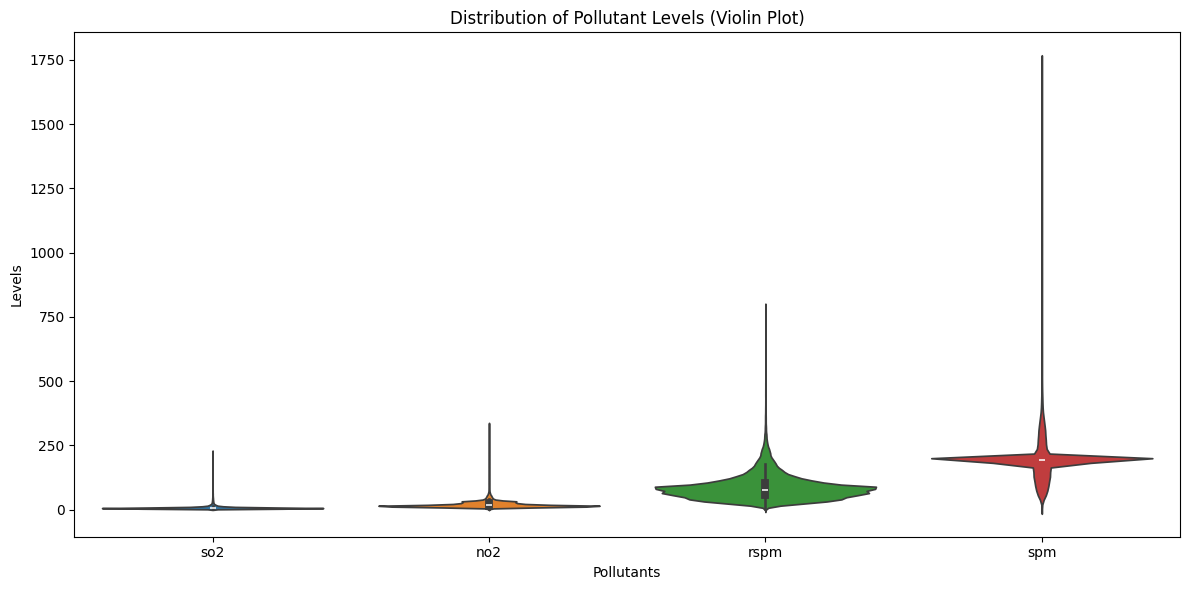

In [51]:
# Violin plot for pollutant distribution
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[pollutants])
plt.title('Distribution of Pollutant Levels (Violin Plot)')
plt.xlabel('Pollutants')
plt.ylabel('Levels')
plt.tight_layout()
plt.show()


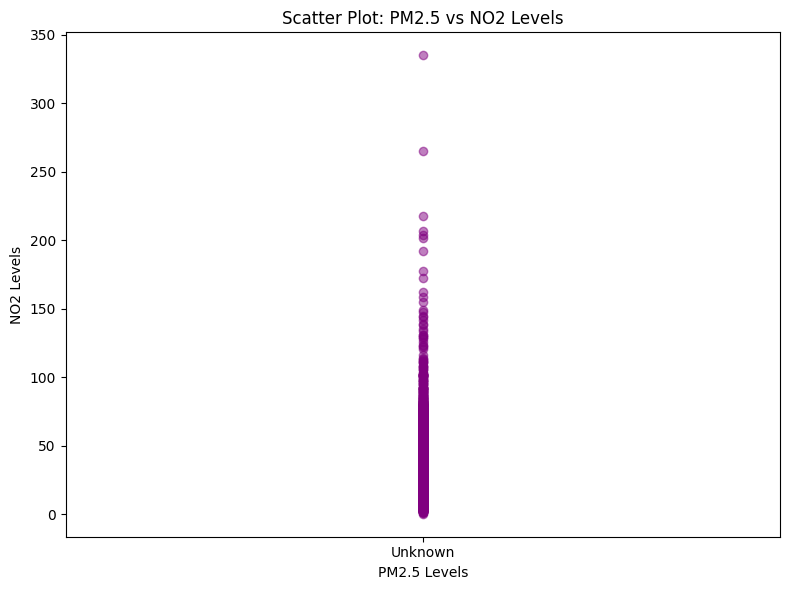

In [52]:
# Scatter plot between PM2.5 and NO2 levels
plt.figure(figsize=(8, 6))
plt.scatter(df['pm2_5'], df['no2'], alpha=0.5, color='purple')
plt.title('Scatter Plot: PM2.5 vs NO2 Levels')
plt.xlabel('PM2.5 Levels')
plt.ylabel('NO2 Levels')
plt.tight_layout()
plt.show()


In [53]:
# Create a bar plot for each pollutant
plt.figure(figsize=(12, 8))
monthly_avg.plot(kind='bar', width=0.8)
plt.title('Monthly Average Levels of Pollutants')
plt.xlabel('Month')
plt.ylabel('Average Level')
plt.legend(title='Pollutants')
plt.tight_layout()  # Adjusts plot to fit labels better
plt.show()

NameError: name 'monthly_avg' is not defined

<Figure size 1200x800 with 0 Axes>

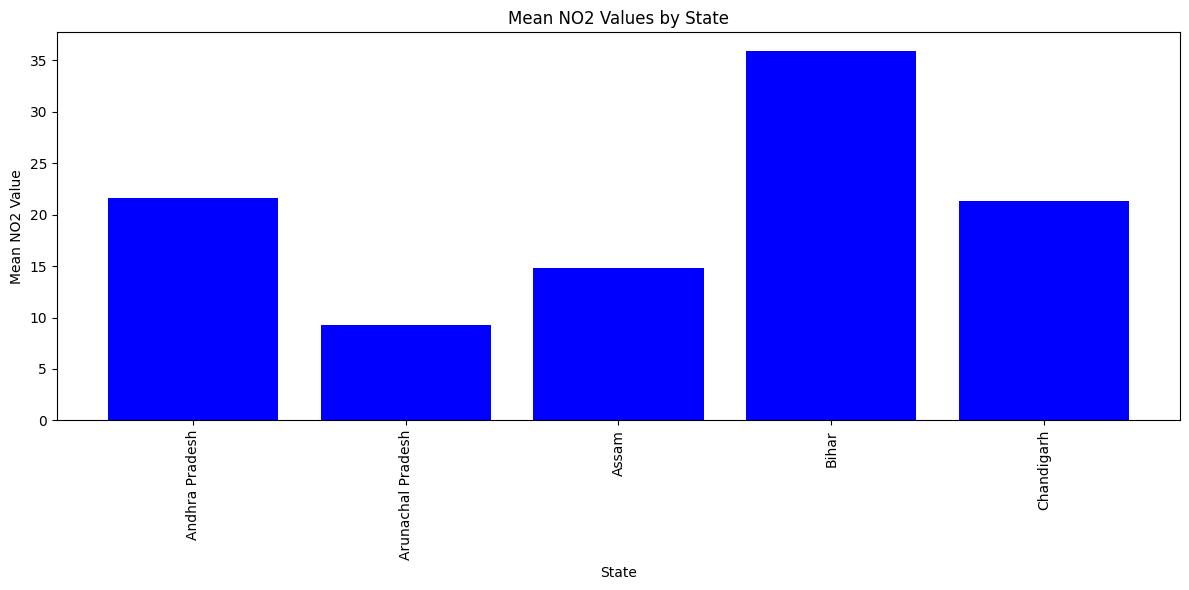

In [54]:
state_means = df.groupby('state')['no2'].mean()

x_axis = state_means.index
y_axis = state_means.values

plt.figure(figsize=(12, 6))
plt.bar(x_axis, y_axis, color='blue')
plt.xlabel('State')
plt.ylabel('Mean NO2 Value')
plt.title('Mean NO2 Values by State')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

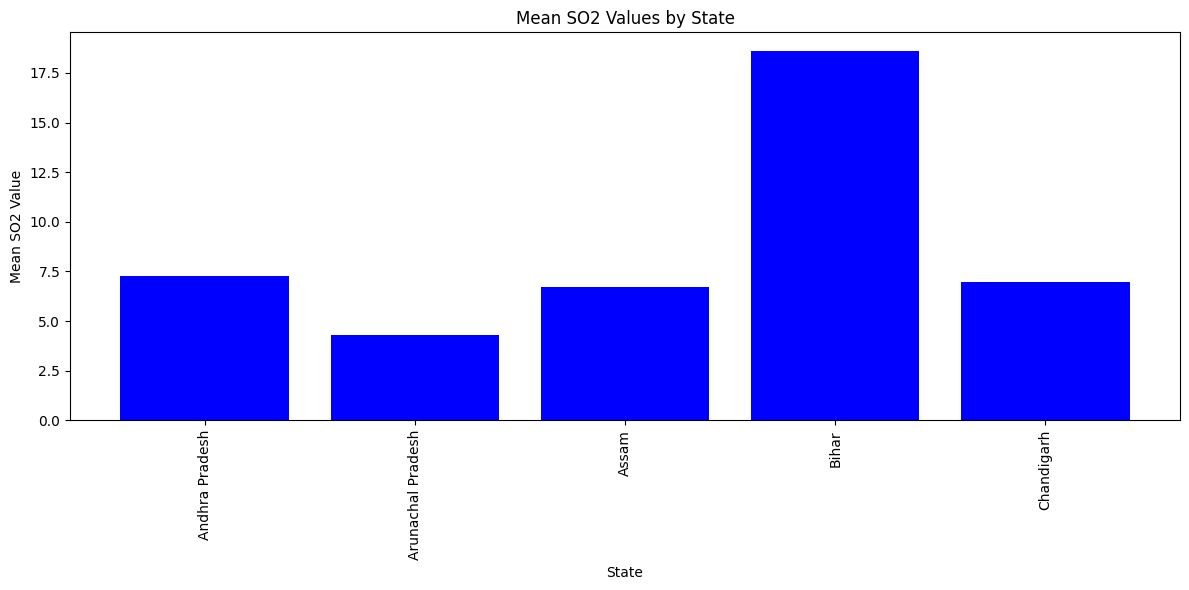

In [55]:
state_means = df.groupby('state')['so2'].mean()

x_axis = state_means.index
y_axis = state_means.values

plt.figure(figsize=(12, 6))
plt.bar(x_axis, y_axis, color='blue')
plt.xlabel('State')
plt.ylabel('Mean SO2 Value')
plt.title('Mean SO2 Values by State')
plt.xticks(rotation=90)  
plt.tight_layout()

<Figure size 1200x800 with 0 Axes>

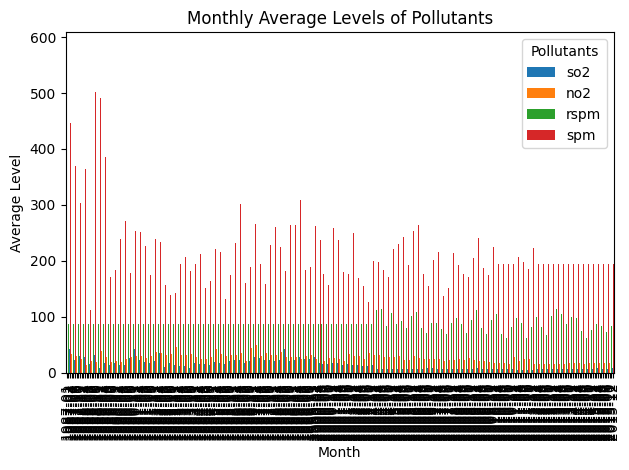

In [77]:
df['date'] = pd.to_datetime(df['date']) 
# Extract month from date
df['Month'] = df['date'].dt.to_period('M')  # Now you can use .dt accessor safely

# Calculate monthly averages for pollutants (assuming pollutants are numeric columns)
monthly_avg = df.groupby('Month').mean(numeric_only=True)  # Exclude non-numeric columns

# Create a bar plot for each pollutant
plt.figure(figsize=(12, 8))
monthly_avg.plot(kind='bar', width=0.8)
plt.title('Monthly Average Levels of Pollutants')
plt.xlabel('Month')
plt.ylabel('Average Level')
plt.legend(title='Pollutants')
plt.tight_layout()  # Adjusts plot to fit labels better
plt.show()